In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import random
import pandas as pd
import tensorflow as tf
import keras as k
from keras.applications import imagenet_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
from keras.applications import VGG16
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
vers = {"numpy":np.__version__,"pandas":pd.__version__,"keras":k.__version__,"tensorflow":tf.__version__,"opencv":cv2.__version__}

In [3]:
vers

{'numpy': '1.18.5',
 'pandas': '1.0.3',
 'keras': '2.4.3',
 'tensorflow': '2.2.0',
 'opencv': '4.3.0'}

In [4]:
MODEL_PATH = "/kaggle/input/clustermodel/avantari.hdf5"
CSV_PATH = "../input/clsuter-csv/result5.csv"
DATASET_PATH = "../input/datasetavantari/dataset"

In [5]:
# Loading the saved model
model = load_model(MODEL_PATH)

In [6]:
model.input_shape

(None, 7, 7, 512)

## As our model accepts the output feature of image from VGG16 pre-trainde model.<br> so when a new image is given 

In [7]:
# initialize vgg16 for feature extraction
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(250,250,3))

58892288/58889256 [==============================] - 2s 0us/step


In [8]:
def predict(p,pre_model):
    '''
    Predicts the label of particular image!!
    first we need to pass the image into the vgg16 model
    and the result feature array with shape (n,7,7,512) will pass to our saved model
    
    Arguments :
    p : input image path (dtype : string)
    pre_model : instance of pre-trained model (dtype : keras.models)
    
    Returns : Predicted label (dtype : int)
    
    '''
    # load our original input image
    imagePath = p
    # loading image and resize
    image = load_img(imagePath, target_size=(250, 250))
    # Convert the image pixels to a numpy array
    image = img_to_array(image)
    # expanding the dimensions ex our image shape is (224,224,3) so far 
    # but if we expand the dimensions it becomes (1, 224, 224, 3)
    image = np.expand_dims(image, axis=0)
    # subtracting the mean RGB pixel intensity from the ImageNet dataset
    image = imagenet_utils.preprocess_input(image)
    # make predictions on the input image which is our feature
    features = pre_model.predict(image, batch_size=32)
    # predicting the label from saved model
    pred = model.predict(features)
    # getting the index of highest probability
    pred = pred.argmax(axis=1)[0]
    return pred

In [9]:
# reading image path from user
input_image = input("enter input image path")
# How many images to display
N = int(input("enter N :"))

enter input image path../input/wolfdata/wolf.jpg
enter N :15


In [10]:
# predicting label for input image
pred_label = predict(input_image,vgg_conv)

In [11]:
# display predicted label
pred_label

5

In [12]:
# reading the csv
data = pd.read_csv(CSV_PATH)

In [13]:
# getting the data where cluster is equal to prediction
clus_data = data.loc[data['cluster'] == pred_label]

In [14]:
def mse(imageA, imageB):
    '''
    calculates'Mean Squared Error' between the two images is the
    sum of the squared difference between the two images;
    NOTE: the two images must have the same dimension

    Arguments:
    imageA : image data (dtype : nd array)
    imageB : image data (dtype : nd array)

    Returns : Mean Squared error
    '''
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    
    
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [15]:
def sort_images(f,clus,t,d_path):
    mse_all = []
    X = DATASET_PATH
    for i in f:
        p = X + "/"+ i
        a = cv2.imread(p)
        b = cv2.imread(t)
        A = cv2.resize(a, (250, 250)) 
        B = cv2.resize(b,(250,250))
        err = mse(A,B)
        mse_all.append((p,err))
    return mse_all

In [16]:
res_tup = sort_images(list(clus_data['image']),pred_label,input_image,DATASET_PATH)

In [17]:
res_tup[:5]

[('../input/datasetavantari/dataset/1846.jpg', 26732.674256),
 ('../input/datasetavantari/dataset/2417.jpg', 26664.418752),
 ('../input/datasetavantari/dataset/2464.jpg', 30802.0196),
 ('../input/datasetavantari/dataset/2774.jpg', 19499.679696),
 ('../input/datasetavantari/dataset/1279.jpg', 16848.170704)]

In [18]:
res_tup.sort(key = lambda x: x[1])

In [19]:
def display_n_results(tup,test,N):
    f = plt.figure(figsize=(8, 8))
    k = 0
    rows = 5
    cols = int(math.ceil(N / rows))
    print("row",rows,"cols",cols)
    image = load_img(test, target_size=(224, 224))
    plt.subplot2grid((rows+1,cols),(0,0))
    plt.imshow(image)
    for i in range(1,rows+1):
        for j in range(0,cols):
            if k == N:
                break
            p = tup[k][0]
            image = load_img(p, target_size=(224, 224))
            plt.subplot2grid((rows+1,cols),(i,j))
            plt.imshow(image)
            k = k+1
    f.savefig("output.png")
    plt.show()

In [20]:
N=23

row 5 cols 5


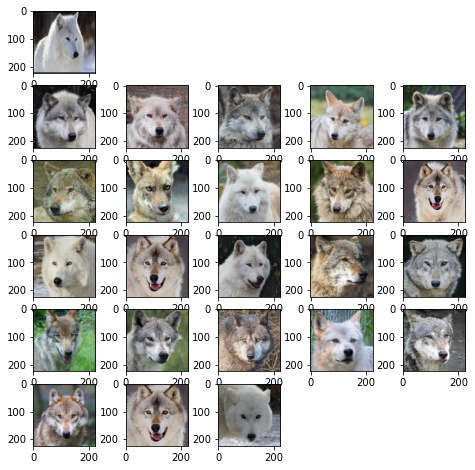

In [21]:
display_n_results(res_tup,input_image,N)